# Q31-40

In [1]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Q.31. アフィン変換(Shear, Skew)
ここは真面目に変換行列が必要(skimageにもあるが楽ではない)

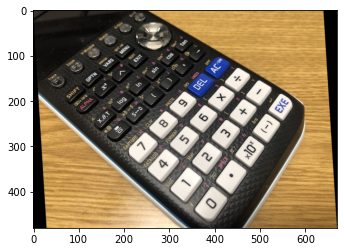

In [2]:
from skimage.transform  import AffineTransform
img = cv2.imread('Calc.jpg')
srcax = np.float32([[0.0, 0.0],[1.0, 0.0],[0.0,1.0]])
tr = cv2.getAffineTransform(srcax, srcax)
shear = 30.0
tr[0,1] = shear/img.shape[0]
dst = cv2.warpAffine(img, tr, (img.shape[1]+np.int(shear), img.shape[0]))
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))

In [3]:
tr

array([[1.    , 0.0625, 0.    ],
       [0.    , 1.    , 0.    ]])

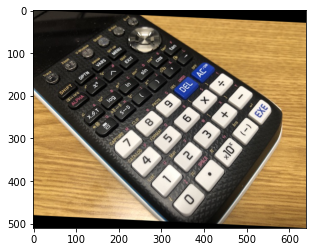

In [4]:
from skimage.transform  import AffineTransform
img = cv2.imread('Calc.jpg')
srcax = np.float32([[0.0, 0.0],[1.0, 0.0],[0.0,1.0]])
tr = cv2.getAffineTransform(srcax, srcax)
shear = 30.0
tr[1,0] = shear/img.shape[1]
dst = cv2.warpAffine(img, tr, (img.shape[1], img.shape[0]+np.int(shear)))
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))

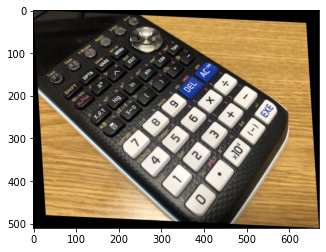

In [5]:
from skimage.transform  import AffineTransform
img = cv2.imread('Calc.jpg')
srcax = np.float32([[0.0, 0.0],[1.0, 0.0],[0.0,1.0]])
tr = cv2.getAffineTransform(srcax, srcax)
shear = 30.0
tr[0,1] = shear/img.shape[0]
tr[1,0] = shear/img.shape[1]
dst = cv2.warpAffine(img, tr, (img.shape[1]+np.int(shear), img.shape[0]+np.int(shear)))
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))

## Q.32. フーリエ変換
numpy使うのが手っ取り早い。OpenCVの方はCインターフェイス時代からの影響で最適サイズを拾ったり，出力が実部虚部くっついてたり，2chだったり(オプション)と面倒。あとnumpyはMATLABでおなじみfftshiftが使える。

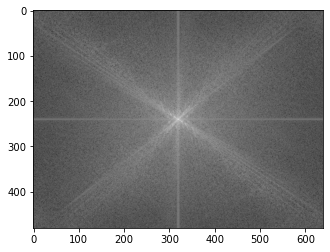

In [6]:
img = cv2.imread('Calc.jpg', cv2.IMREAD_GRAYSCALE)
fimg = np.fft.fft2(img)
fimg = np.fft.fftshift(fimg)
plt.imshow(np.log(abs(fimg)+1), cmap='gray')


OpenCVの場合fftshiftが無くて面倒なので市松模様の画像を要素ごとに乗算して高周波と低周波を反転させる技を使う。cv2.DFT_COMPLEX_OUTPUTで2チャンネルで実部虚部に出してくれる

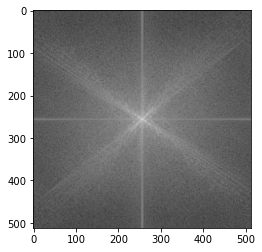

In [7]:
img = cv2.imread('Calc.jpg', cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (512,512))
emat = np.eye(2)
emat[emat==0] = -1
img.shape
emask = np.tile(emat, (256, 256)) 
mimg = img*emask
# plt.imshow(mimg[0:20, 0:20], cmap='gray')
fimg = cv2.dft(mimg, flags=cv2.DFT_COMPLEX_OUTPUT)
fimg = fimg[:, :, 0] + 1j * fimg[:, :, 1] #面倒なので複素数に戻す
plt.imshow(np.log(abs(fimg)+1), cmap='gray')


## Q.33. ローパスフィルタ
問題の図だとフィルタの畳み込みになってておかしいが，前問のfftの結果に01でマスクを作って乗算すれば良い。OpenCVの描画関数cv2.circleを使う。
フィルタの半径は本来は空間周波数に基いて指定すべき話だが，わかりやすくする為に適当に32。

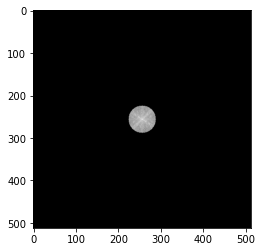

In [8]:
img = cv2.imread('Calc.jpg', cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (512,512))
fimg = np.fft.fft2(img)
fimg = np.fft.fftshift(fimg)
mask = np.zeros(img.shape)
cv2.circle(mask, (256, 256), 32,1, -1)
fimg = fimg * mask
plt.imshow(np.log(abs(fimg)+1), cmap='gray')


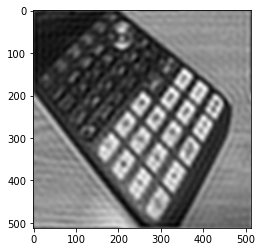

In [9]:
dst = np.fft.ifft2(np.fft.ifftshift(fimg))
plt.imshow(np.real(dst), cmap='gray')


OpenCVの場合なぜかdft関数でDFT_INVERSEを使えと書いてあるものも多いがidftで良い。

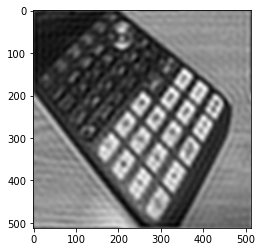

In [10]:
img = cv2.imread('Calc.jpg', cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (512,512))
emat = np.eye(2)
emat[emat==0] = -1
img.shape
emask = np.tile(emat, (256, 256)) #Calcは512x512なので2x256=512
mimg = img*emask
#plt.imshow(mimg[0:200, 0:200], cmap='gray')
fimg = cv2.dft(mimg, flags=cv2.DFT_COMPLEX_OUTPUT)
mask = np.zeros(img.shape)
cv2.circle(mask, (256, 256), 32,1, -1)
fimg[:, :, 0]  *= mask
fimg[:, :, 1] *= mask
# plt.imshow(np.log(1+fimg[:, :, 0]), cmap='gray')
dst = cv2.idft(fimg, cv2.DFT_SCALE)
dst[:, :, 0] *= emask
plt.imshow(dst[:, : , 0], cmap='gray')

## Q.34. ハイパスフィルタ
前問のフィルタを引っくり返すだけで良い。OpenCVの場合も同じなので省略

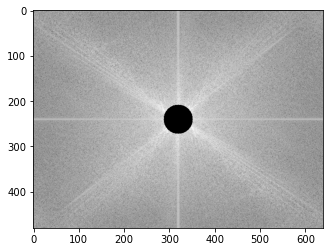

In [11]:
img = cv2.imread('Calc.jpg', cv2.IMREAD_GRAYSCALE)
fimg = np.fft.fft2(img)
fimg = np.fft.fftshift(fimg)
mask = np.zeros(img.shape)
cv2.circle(mask, (int(img.shape[1]/2), int(img.shape[0]/2)), 32,1, -1)
mask = 1-mask
fimg = fimg * mask
plt.imshow(np.log(abs(fimg)+1), cmap='gray')


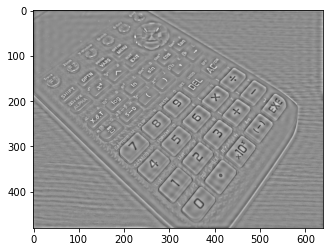

In [12]:
dst = np.fft.ifft2(np.fft.ifftshift(fimg))
plt.imshow(np.real(dst), cmap='gray')


## Q.35. フーリエ変換 バンドパスフィルタ
サイズの違う2つ円(片方は補数)を書いてANDというか乗算するだけで良い

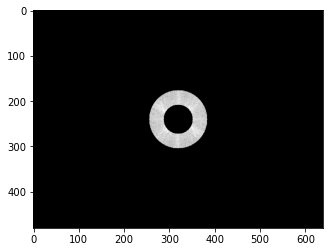

In [13]:
img = cv2.imread('Calc.jpg', cv2.IMREAD_GRAYSCALE)
fimg = np.fft.fft2(img)
fimg = np.fft.fftshift(fimg)
mask = np.zeros(img.shape)
cv2.circle(mask, (int(img.shape[1]/2), int(img.shape[0]/2)), 32,1, -1)
mask = 1-mask
mask2 = np.zeros(img.shape)
cv2.circle(mask2, (int(img.shape[1]/2), int(img.shape[0]/2)), 64,1, -1)
mask *= mask2
fimg = fimg * mask
plt.imshow(np.log(abs(fimg)+1), cmap='gray')


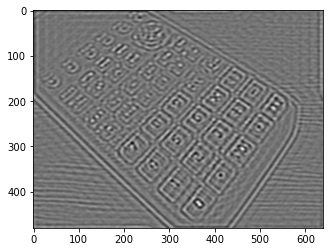

In [14]:
dst = np.fft.ifft2(np.fft.ifftshift(fimg))
plt.imshow(np.real(dst), cmap='gray')


## Q.36. 離散コサイン変換
JPEGのアルゴリズムでお馴染のDCT。不可逆なので実部しか帰ってこない。OpenCVではまんま関数がある。
問題ではJPEGのアルゴリズムを再現したいので8x8ブロックごとにとの指定のため入れ子のループで対応したが，このようなループを極力排したいところ。
ちなみにPython3.8からshared memoryが使えるので，並列化は楽に実装できそう。(3.7以前でも方法はある)

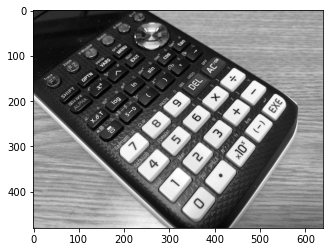

In [15]:
from skimage.measure import block_reduce
step = 8
img = cv2.imread('Calc.jpg', cv2.IMREAD_GRAYSCALE)
dst = np.zeros(img.shape)
for y in range(0, img.shape[0], 8):
    for x in range(0, img.shape[1], 8):
        subimg = img[y: y+8, x: x+8]
        cimg = cv2.dct(np.float32(subimg)/255)
        dst[y: y+8, x: x+8] = cv2.idct(cimg)
        
plt.imshow(dst, cmap='gray')


## Q.37. PSNR
あまりここらへんは関わらない分野なので話半分で見て欲しい。

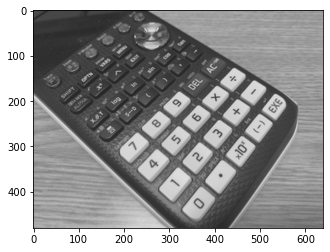

In [16]:
from skimage.measure import block_reduce
step = 8
img = cv2.imread('Calc.jpg', cv2.IMREAD_GRAYSCALE)
dst2 = np.zeros(img.shape)
for y in range(0, img.shape[0], 8):
    for x in range(0, img.shape[1], 8):
        subimg = img[y: y+8, x: x+8]
        cimg = cv2.dct(np.float32(subimg)/255)
        cimg2 = np.zeros((8,8), dtype=np.float32)
        cimg2[0:4, 0:4] = cimg[0:4, 0:4]
        dst2[y: y+8, x: x+8] = cv2.idct(cimg2)
        
plt.imshow(dst2, cmap='gray')


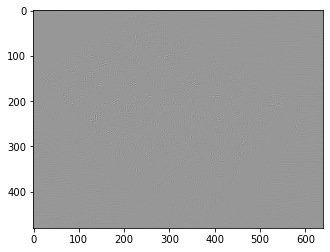

In [17]:
plt.imshow(dst-dst2, cmap='gray')

In [18]:
mse = np.power(dst-dst2, 2).sum()/(img.shape[0]*img.shape[1])
psnr = 10*np.log10(1/mse)
print(psnr)

28.45215165040706


## Q.38. 量子化
省略

## Q.39. YCbCr表色系
cvtColorで変換可能

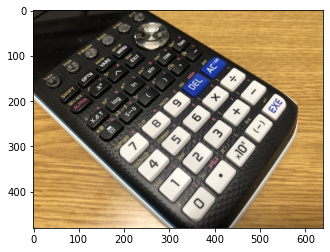

In [19]:
img = cv2.imread('Calc.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

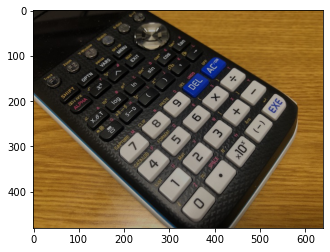

In [20]:
ycimg = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
ycimg[:, :, 0] = np.uint8(ycimg[:, :, 0] * 0.7)
dst = cv2.cvtColor(ycimg, cv2.COLOR_YCrCb2BGR)
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))

## Q.40. JPEG
省略